<a href="https://colab.research.google.com/github/umairchanna57/Deep_learning/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
img='/content/drive/MyDrive/data/umair.jpeg'

In [27]:
plt.imread(img)

array([[[46, 11,  9],
        [46, 11,  9],
        [46, 11,  9],
        ...,
        [57, 11, 13],
        [57, 11, 13],
        [57, 11, 13]],

       [[46, 11,  9],
        [46, 11,  9],
        [46, 11,  9],
        ...,
        [57, 11, 13],
        [57, 11, 13],
        [57, 11, 13]],

       [[46, 11,  9],
        [46, 11,  9],
        [46, 11,  9],
        ...,
        [57, 11, 13],
        [57, 11, 13],
        [57, 11, 13]],

       ...,

       [[31, 18, 10],
        [31, 18, 10],
        [31, 18, 10],
        ...,
        [10,  1,  2],
        [10,  2,  0],
        [10,  2,  0]],

       [[30, 17,  9],
        [30, 17,  9],
        [30, 17,  9],
        ...,
        [10,  1,  2],
        [10,  2,  0],
        [10,  2,  0]],

       [[28, 18,  9],
        [28, 18,  9],
        [30, 17,  9],
        ...,
        [10,  1,  2],
        [10,  2,  0],
        [10,  2,  0]]], dtype=uint8)

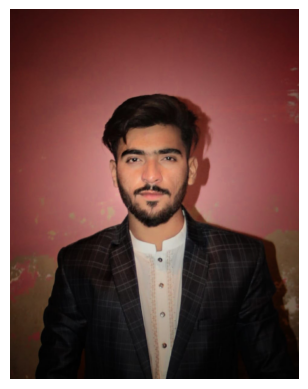

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open(img)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
!pip install --upgrade tensorflow

In [9]:
!pip uninstall keras
!pip uninstall tensorflow

Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.13.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.13.1
Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.13.0


In [10]:
!pip install keras
!pip install tensorflow

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)


In [29]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

SIZE=256
img_data=[]
image=cv2.imread('//content/drive/MyDrive/data/umair.jpeg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image= cv2.resize(image,(SIZE,SIZE))
img_data.append(img_to_array(image))
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu' , padding='same' , input_shape=(SIZE,SIZE ,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3), activation='relu' , padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8,(3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D((2,2) ,padding='same'))

model.add(Conv2D(8,(3,3),activation='relu' , padding='same' , ))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 32, 32, 8)        

In [30]:


model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step - loss: 8.0129e-04 - accuracy: 0.8805
Epoch 2502/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.0318e-04 - accuracy: 0.8786
Epoch 2503/5000
1/1 [==============================] - 0s 19ms/step - loss: 8.0221e-04 - accuracy: 0.8799
Epoch 2504/5000
1/1 [==============================] - 0s 20ms/step - loss: 7.9952e-04 - accuracy: 0.8806
Epoch 2505/5000
1/1 [==============================] - 0s 16ms/step - loss: 7.9691e-04 - accuracy: 0.8824
Epoch 2506/5000
1/1 [==============================] - 0s 19ms/step - loss: 7.9595e-04 - accuracy: 0.8816
Epoch 2507/5000
1/1 [==============================] - 0s 21ms/step - loss: 7.9728e-04 - accuracy: 0.8823
Epoch 2508/5000
1/1 [==============================] - 0s 17ms/step - loss: 7.9741e-04 - accuracy: 0.8814
Epoch 2509/5000
1/1 [==============================] - 0s 22ms/step - loss: 7.9730e-04 - accuracy: 0.8816
Epoch 2510/

In [34]:


print("Neural network output")
pred = model.predict(img_array)

Neural network output
1/1 [==============================] - 0s 24ms/step


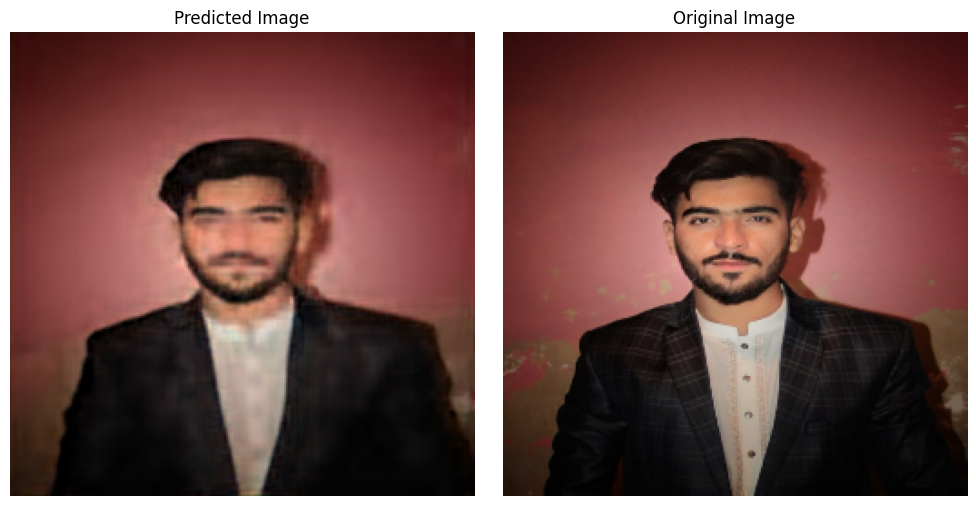

In [43]:
import matplotlib.pyplot as plt

# Assuming 'image' is your original image array
# Assuming 'pred' is the predicted image array

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the predicted image
axs[0].imshow(pred[0].reshape(SIZE, SIZE, 3), cmap="jet")
axs[0].axis('off')
axs[0].set_title('Predicted Image')

# Plot the original image
axs[1].imshow(image, cmap="jet")
axs[1].axis('off')
axs[1].set_title('Original Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

